# **SMART IRIS DISEASE DETECTION WITH AI :**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy16.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy2666.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy140.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy105.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy2676.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy80.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy85.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy79.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy61.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy117.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy130.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy84.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy102.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy12.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy128.jpg
/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy129.j

## Import libraries :

In [2]:
import os
import shutil
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam

2025-10-02 06:06:59.612606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759385219.634948    1211 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759385219.641832    1211 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Reading the dataset :

In [3]:
dataset_path = '/kaggle/input/dataset/Augmented Dataset'

In [4]:
# Dataset path
dataset_dir = '/kaggle/input/dataset/Augmented Dataset'
classes = ['Healthy', 'Unhealthy']

# Output directory
output_dir = '/kaggle/working/output_dataset'
os.makedirs(output_dir, exist_ok=True)

# Create train/val/test directories
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(output_dir, split), exist_ok=True)
    for cls in classes:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# Split images
for cls in classes:
    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)
    train_val, test = train_test_split(images, test_size=0.2, random_state=42)
    train, val = train_test_split(train_val, test_size=0.25, random_state=42)  # 0.25*0.8 = 0.2

    # Copy files
    for img in train:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("✅ Dataset split into train/val/test for Healthy and Unhealthy")


✅ Dataset split into train/val/test for Healthy and Unhealthy


## Generating images :

In [5]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Training generator with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test generator (no augmentation)
val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Flow from directory
train_generator = train_datagen.flow_from_directory(
    os.path.join(output_dir, 'train'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(output_dir, 'val'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(output_dir, 'test'),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("Train classes:", train_generator.class_indices)
print("Validation classes:", val_generator.class_indices)
print("Test classes:", test_generator.class_indices)



Found 239 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
Train classes: {'Healthy': 0, 'Unhealthy': 1}
Validation classes: {'Healthy': 0, 'Unhealthy': 1}
Test classes: {'Healthy': 0, 'Unhealthy': 1}


## Data Visualizing :

### Healthy images :

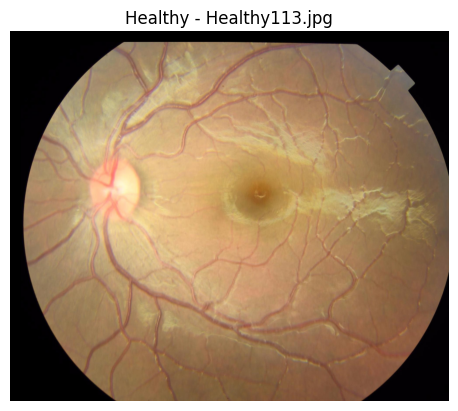

In [6]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to Augmented Dataset
dataset_dir = '/kaggle/input/dataset/Augmented Dataset'

class_name = "Healthy"  
class_path = os.path.join(dataset_dir, class_name)

# List all image files in that class
image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Pick a random image
random_image = random.choice(image_files)
image_path = os.path.join(class_path, random_image)

# Show the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f"{class_name} - {random_image}")
plt.axis("off")
plt.show()


### Unhealthy images :

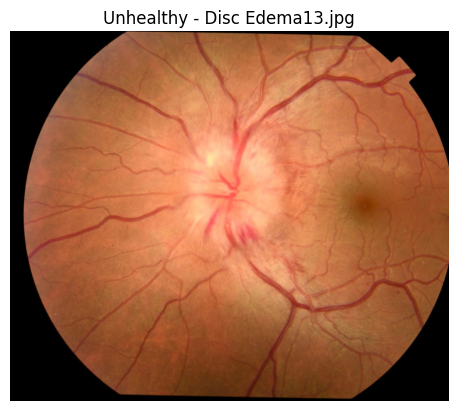

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to Augmented Dataset
dataset_dir = '/kaggle/input/dataset/Augmented Dataset'

class_name = "Unhealthy"   
class_path = os.path.join(dataset_dir, class_name)

# List all image files in that class
image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Pick a random image
random_image = random.choice(image_files)
image_path = os.path.join(class_path, random_image)

# Show the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(f"{class_name} - {random_image}")
plt.axis("off")
plt.show()


## Splitting train and test dataset : 

In [8]:
trainpath = "/kaggle/working/output_dataset/train"
testpath = "/kaggle/working/output_dataset/test"

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train = train_datagen.flow_from_directory(
    trainpath,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

# Load testing images
test = test_datagen.flow_from_directory(
    testpath,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary', 
    shuffle=False  
)

# Print class mappings
print("Class indices:", train.class_indices)


Found 239 images belonging to 2 classes.
Found 81 images belonging to 2 classes.
Class indices: {'Healthy': 0, 'Unhealthy': 1}


## Model building :

In [10]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
# Load base model without top
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze most layers
for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-4:]:  # last 4 layers
    layer.trainable = True

# Add custom head
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # binary output

vgg16 = Model(inputs=base_model.input, outputs=predictions)
vgg16.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
vgg16.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 10,290,945 (39.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

## Regularization :

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = vgg16.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1759385405.005892    1283 service.cc:148] XLA service 0x7da2f0005770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759385405.005928    1283 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1759385405.005931    1283 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1759385405.418631    1283 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/8 ━━━━━━━━━━━━━━━━━━━━ 2:10 19s/step - accuracy: 0.5312 - loss: 4.9913

I0000 00:00:1759385419.501724    1283 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.6068 - loss: 3.2080 - val_accuracy: 0.7500 - val_loss: 0.7894
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 830ms/step - accuracy: 0.7221 - loss: 0.9779 - val_accuracy: 0.7000 - val_loss: 0.6300
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 911ms/step - accuracy: 0.7376 - loss: 0.5839 - val_accuracy: 0.7500 - val_loss: 0.5156
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 974ms/step - accuracy: 0.7229 - loss: 0.5087 - val_accuracy: 0.7625 - val_loss: 0.4328
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 919ms/step - accuracy: 0.7786 - loss: 0.4311 - val_accuracy: 0.8875 - val_loss: 0.2685
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 912ms/step - accuracy: 0.8469 - loss: 0.3536 - val_accuracy: 0.7875 - val_loss: 0.3474
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 908ms/step - accuracy: 0.8429 - loss: 0.3752 - val_accuracy: 0.8750 - val_loss: 0.3459
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 910ms/step - accuracy: 0.8907 - loss: 0.2967 - val_accuracy: 0.9625 - val_loss: 0.1551
Epoch

## Testing Model & Data Prediction :

### Testing HEALTHY images :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


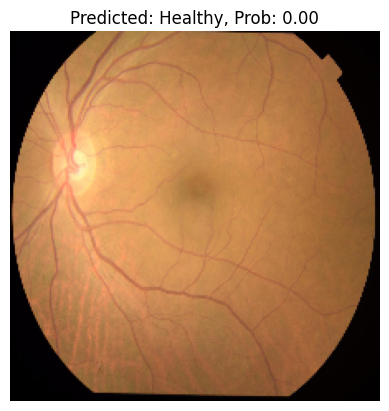

In [14]:
img_path = '/kaggle/input/dataset/Augmented Dataset/Healthy/Healthy108.jpg'

# Load image
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict
pred_prob = vgg16.predict(x)[0][0]

# Threshold to determine class
pred_class = "Unhealthy" if pred_prob >= 0.5 else "Healthy"

# Show image
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {pred_class}, Prob: {pred_prob:.2f}")
plt.show()


## Testing Unhealthy images :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


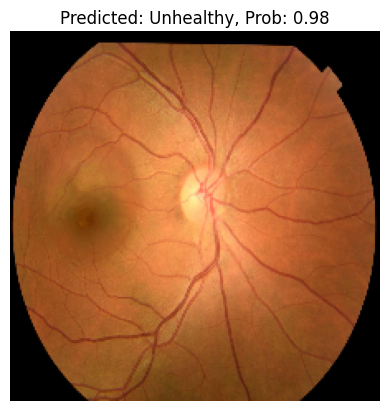

In [15]:
img_path = '/kaggle/input/dataset/Augmented Dataset/Unhealthy/CSCR51.jpg'

# Load image
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict
pred_prob = vgg16.predict(x)[0][0]

# Threshold to determine class
pred_class = "Unhealthy" if pred_prob >= 0.5 else "Healthy"

# Show image
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {pred_class}, Prob: {pred_prob:.2f}")
plt.show()


## Testing Healthy images from test data :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


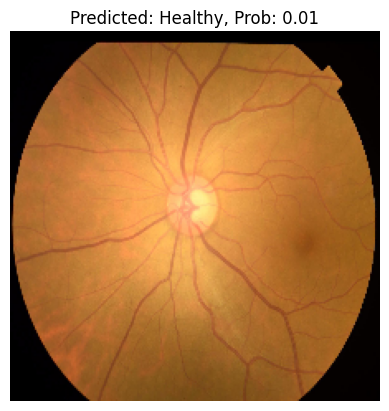

Predicted probability of Unhealthy: 0.0057868487
Predicted class: Healthy


In [22]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Path to image
img_path = '/kaggle/working/output_dataset/test/Healthy/Healthy2656.jpg'

# Load and preprocess
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict
pred_prob = vgg16.predict(x)[0][0]  # probability of Unhealthy

# Threshold
pred_class = "Unhealthy" if pred_prob >= 0.5 else "Healthy"

# Show image
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {pred_class}, Prob: {pred_prob:.2f}")
plt.show()

# Print probabilities
print("Predicted probability of Unhealthy:", pred_prob)
print("Predicted class:", pred_class)


## Testing Unhealthy images from test data :

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


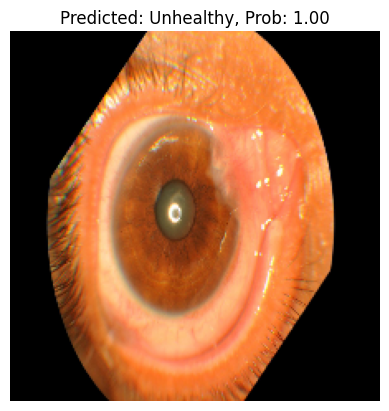

Predicted probability of Unhealthy: 1.0
Predicted class: Unhealthy


In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Path to image
img_path = '/kaggle/working/output_dataset/test/Unhealthy/Pterygium5.jpg'

# Load and preprocess
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Predict
pred_prob = vgg16.predict(x)[0][0]  # probability of Unhealthy

# Threshold
pred_class = "Unhealthy" if pred_prob >= 0.5 else "Healthy"

# Show image
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {pred_class}, Prob: {pred_prob:.2f}")
plt.show()

# Print probabilities
print("Predicted probability of Unhealthy:", pred_prob)
print("Predicted class:", pred_class)


## Saving the best model :

In [23]:
vgg16.save('vgg_model.keras')

## Predictions :

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from keras.applications.vgg16 import preprocess_input

In [26]:
# Evaluate model performance
loss, accuracy = vgg16.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.9541 - loss: 0.2032 
Test Loss: 0.1694
Test Accuracy: 0.9630


## Performance metrics :

In [27]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities
y_probs = vgg16.predict(test_generator)
y_pred = (y_probs >= 0.5).astype(int).flatten()  # thresholding

# True labels
y_true = test_generator.classes

# Class names
labels = list(test_generator.class_indices.keys())

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 501ms/step
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.97      0.95      0.96        39
   Unhealthy       0.95      0.98      0.96        42

    accuracy                           0.96        81
   macro avg       0.96      0.96      0.96        81
weighted avg       0.96      0.96      0.96        81

Confusion Matrix:
[[37  2]
 [ 1 41]]


## Visualizations :

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step


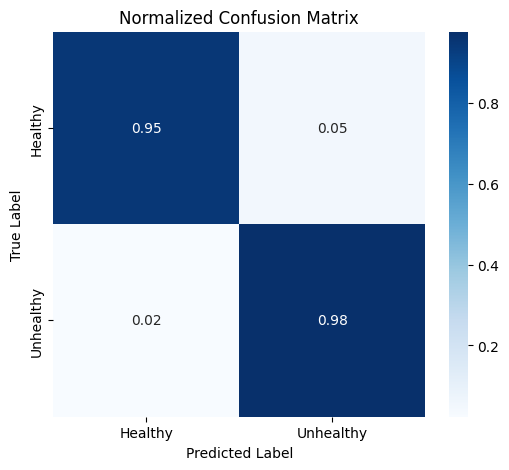

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Class names in the order of your generator
class_names = list(test_generator.class_indices.keys())

# Predict probabilities on test set
y_probs = vgg16.predict(test_generator)

y_pred = (y_probs >= 0.5).astype(int).flatten()

# True labels
y_true = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize row-wise
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# *Plot Training vs Validation Accuracy & Loss :*

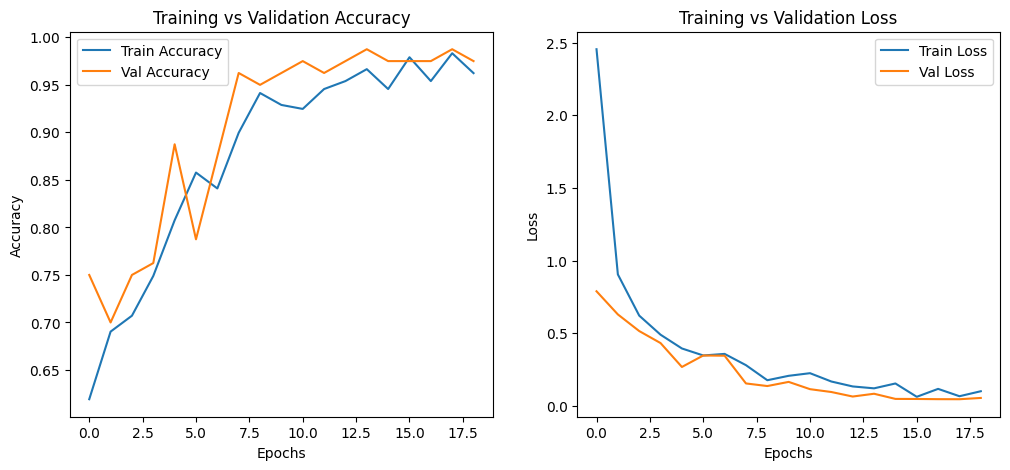

In [30]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# *Grad-CAM Visualization :*

In [36]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# ===============================
# Grad-CAM heatmap generator
# ===============================
def make_gradcam_heatmap(img_array, model, last_conv_layer_name='block5_conv3'):
    """
    Generates Grad-CAM heatmap for a binary VGG16 model.
    """
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]  # Binary classification

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]  # remove batch dimension
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize and return as NumPy array
    heatmap = np.maximum(heatmap, 0)
    if np.max(heatmap) != 0:
        heatmap /= np.max(heatmap)
    return heatmap.numpy() if isinstance(heatmap, tf.Tensor) else heatmap


# ===============================
# Grad-CAM overlay display
# ===============================
def display_gradcam(img_path, model, last_conv_layer_name='block5_conv3'):
    """
    Displays Grad-CAM overlay on the original image.
    """
    # Load and preprocess image
    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict class
    preds = model.predict(x)
    pred_class = "Unhealthy" if preds[0][0] >= 0.5 else "Healthy"

    # Generate heatmap
    heatmap = make_gradcam_heatmap(x, model, last_conv_layer_name)
    
    # Convert heatmap to uint8
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Read original image
    img_original = cv2.imread(img_path)
    img_original = cv2.resize(img_original, (224, 224))

    # Resize heatmap to match image
    if heatmap.shape != img_original.shape:
        heatmap = cv2.resize(heatmap, (img_original.shape[1], img_original.shape[0]))

    # Superimpose
    superimposed_img = cv2.addWeighted(img_original, 0.6, heatmap, 0.4, 0)

    # Display
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Predicted: {pred_class}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


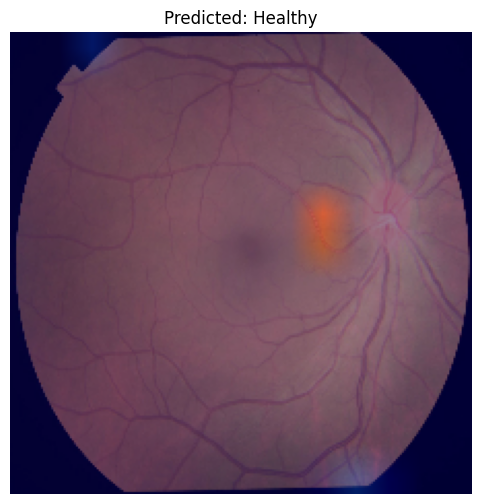

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


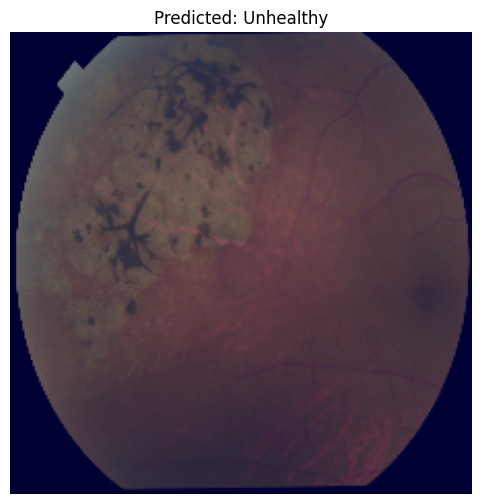

In [37]:
# Display Grad-CAM for Healthy and Unhealthy examples
display_gradcam('/kaggle/working/output_dataset/test/Healthy/Healthy117.jpg', vgg16)
display_gradcam('/kaggle/working/output_dataset/test/Unhealthy/Retinitis Pigmentosa1.jpg', vgg16)
